In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'Deal my car.ipynb',
 'EDA.ipynb',
 'Model Selection.ipynb',
 'pipe_model.pkl',
 'ready_for_eda.csv',
 'ready_for_feature_extraction.csv',
 'ready_for_model_selection.csv',
 '__pycache__']

In [3]:
df = pd.read_csv('ready_for_eda.csv')

In [4]:
df.head()

,title,price,year,make,model,trim,bodytype,transmission,odometer,drivetrain,description,url
0,2019 Ram 1500 Limited - NO FEES!,57990,2019,Ram,1500,Limited,Truck,Automatic,82584,4x4,2019 Ram 1500 Limited Crew Cab 4x4 w/Leather+P...,https://www.kijiji.ca/v-cars-trucks/calgary/20...
1,2017 Jeep Patriot North Edition w/Heated Seat...,23888,2017,Jeep,Patriot,North Edition w/Heated Seats/Touch Screen Display,SUV,Automatic,75934,4x4,Thanks for viewing our House Of Cars Olympic P...,https://www.kijiji.ca/v-cars-trucks/calgary/20...
2,2014 Cadillac SRX Performance,17995,2014,Cadillac,SRX,Performance,SUV,Automatic,191631,AWD,Double L Motors Ltd.2014 Cadillac SRX AWD Perf...,https://www.kijiji.ca/v-cars-trucks/calgary/20...
3,2020 Lexus GX 460 GX 460 Auto *Executive Pack...,73506,2020,Lexus,GX,GX 460 Auto *Executive Package*,SUV,Automatic,58080,4x4,This 2020 Lexus GX460 Executive Package is a l...,https://www.kijiji.ca/v-cars-trucks/calgary/20...
4,2018 Toyota Tacoma 4x4 Double Cab V6 Auto SR5,49888,2018,Toyota,Tacoma,4x4 Double Cab V6 Auto SR5,Truck,Automatic,73985,4x4,Thanks for viewing our House Of Cars Chinook I...,https://www.kijiji.ca/v-cars-trucks/calgary/20...


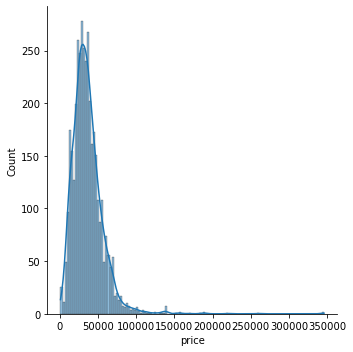

In [5]:
# Let's look at the distribution of the numeric features and see if we should help out with the skewness

sns.displot(data=df,x = 'price',kde = True)

In [6]:
df['log_price'] = np.log1p(df['price'])

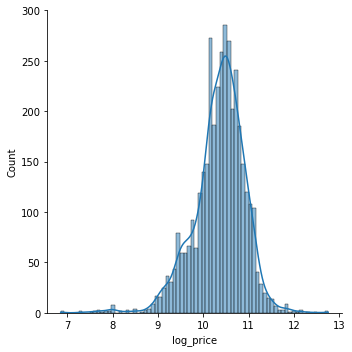

In [7]:
sns.displot(data=df,x = 'log_price', kde = True)

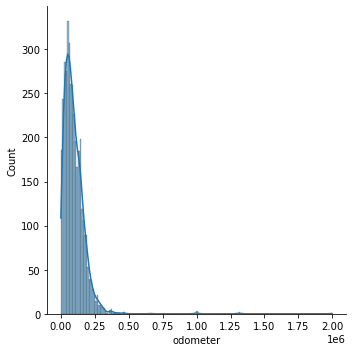

In [8]:
sns.displot(data=df,x = 'odometer',kde=True)

In [9]:
df['log_odometer'] = np.log1p(df['odometer'])


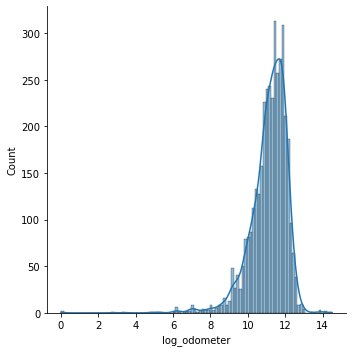

In [10]:
sns.displot(data=df,x = 'log_odometer',kde=True)

In [11]:
df['age'] = 2023 - df['year']
df['annual_km'] = df['odometer']/df['age']
df['annual_km'] = df['annual_km'].astype('int')

In [12]:
df.head(2)

,title,price,year,make,model,trim,bodytype,transmission,odometer,drivetrain,description,url,log_price,log_odometer,age,annual_km
0,2019 Ram 1500 Limited - NO FEES!,57990,2019,Ram,1500,Limited,Truck,Automatic,82584,4x4,2019 Ram 1500 Limited Crew Cab 4x4 w/Leather+P...,https://www.kijiji.ca/v-cars-trucks/calgary/20...,10.968043,11.321583,4,20646
1,2017 Jeep Patriot North Edition w/Heated Seat...,23888,2017,Jeep,Patriot,North Edition w/Heated Seats/Touch Screen Display,SUV,Automatic,75934,4x4,Thanks for viewing our House Of Cars Olympic P...,https://www.kijiji.ca/v-cars-trucks/calgary/20...,10.081173,11.237633,6,12655


<AxesSubplot:xlabel='year', ylabel='price'>

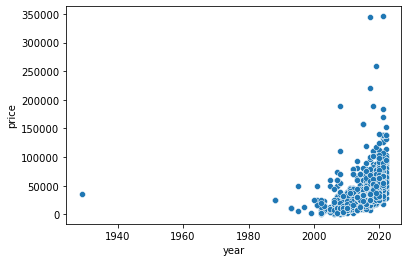

In [13]:
sns.scatterplot(data=df, x ='year' , y = 'price')

In [14]:
df = df.drop(df['year'].idxmin())
df = df.drop([126,1945,637,1197,453,1923,2009,2032,245])

<AxesSubplot:xlabel='year', ylabel='price'>

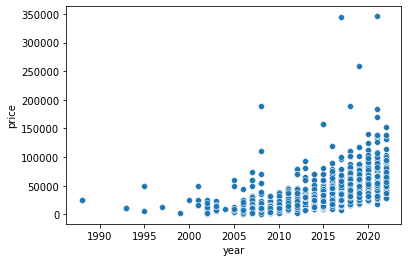

In [15]:
sns.scatterplot(data=df, x ='year' , y = 'price')

<AxesSubplot:xlabel='log_odometer', ylabel='log_price'>

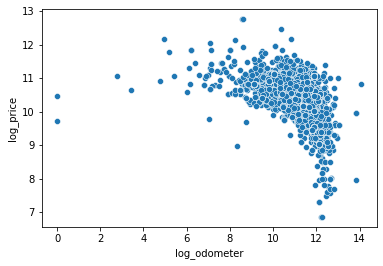

In [16]:
sns.scatterplot(data=df, x ='log_odometer' , y = 'log_price')

<AxesSubplot:xlabel='transmission', ylabel='price'>

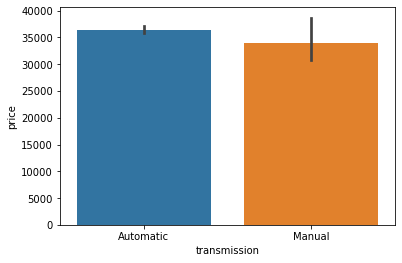

In [17]:
sns.barplot(data=df,x = 'transmission', y = 'price')


In [18]:
df.price.median()

33704.0

<AxesSubplot:>

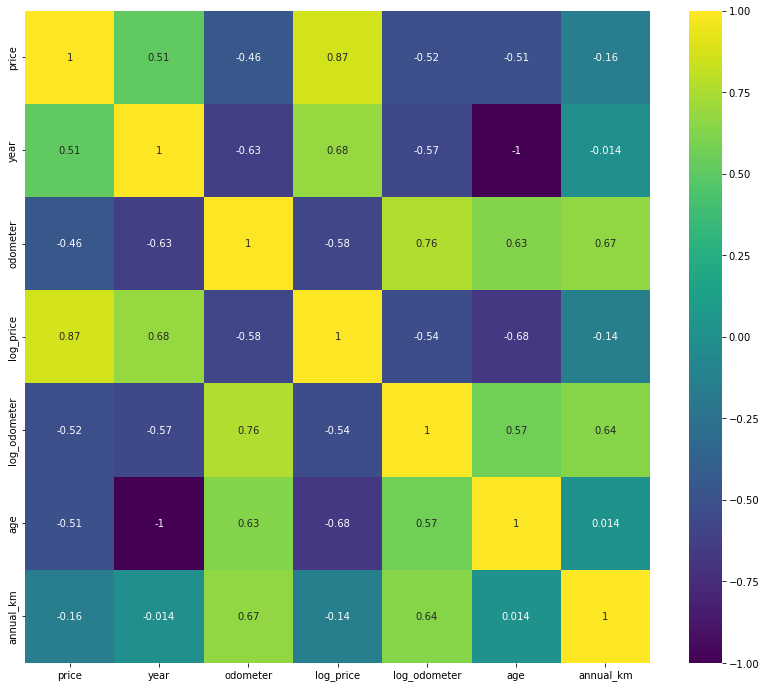

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(data=df.corr(), annot=True, cmap = 'viridis')

<AxesSubplot:xlabel='price', ylabel='make'>

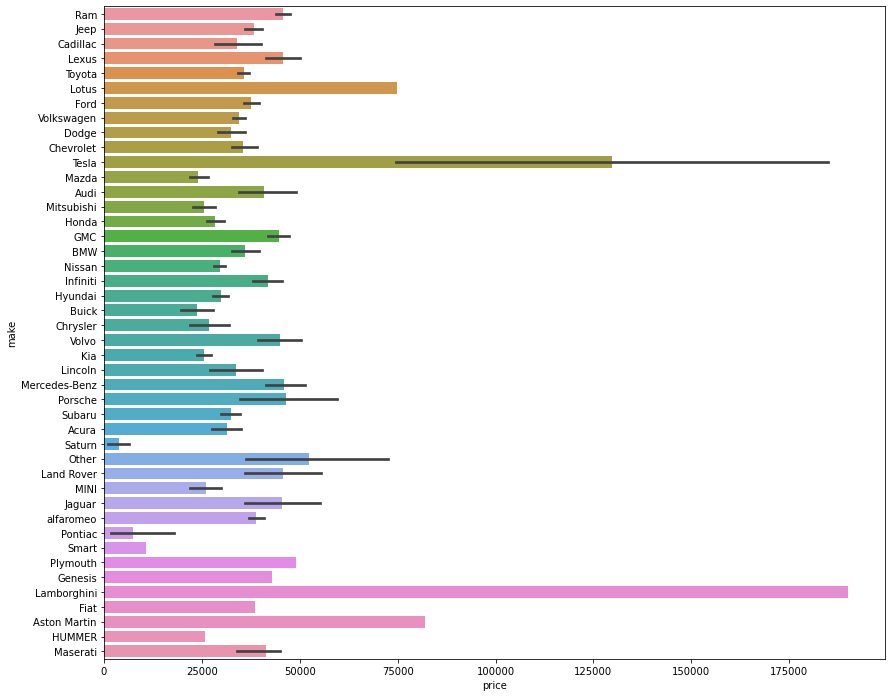

In [20]:
plt.figure(figsize=(14,12))
sns.barplot(data=df,x = 'price',y  = 'make')

In [21]:
# sns.pairplot(data=df)

In [22]:
#Feature extraction

df.to_csv('ready_for_feature_extraction.csv',index = False)

In [23]:
df = pd.read_csv('ready_for_feature_extraction.csv')

In [24]:
# Now we can extract data from description using counter

from collections import Counter
Counter(" ".join(df["description"]).split()).most_common(300)


[('and', 55278),
 ('Rear', 21328),
 ('And', 20006),
 ('-inc:', 18400),
 ('Front', 16082),
 ('with', 14692),
 ('to', 14277),
 ('the', 13369),
 ('Door', 11543),
 ('a', 11452),
 ('for', 10682),
 ('Power', 10676),
 ('of', 10611),
 ('Passenger', 10322),
 ('our', 9294),
 ('in', 7143),
 ('you', 6754),
 ('Driver', 6680),
 ('vehicle', 6486),
 ('is', 6038),
 ('Control', 6016),
 ('Floor', 5349),
 ('Steering', 5222),
 ('on', 5169),
 ('Side', 5118),
 ('Row', 5117),
 ('front', 4821),
 ('or', 4448),
 ('Console', 4262),
 ('&', 4208),
 ('your', 4163),
 ('Cargo', 4160),
 ('Engine', 4158),
 ('Wheel', 4142),
 ('power', 4012),
 ('Centre', 4006),
 ('Trim', 3974),
 ('Windows', 3928),
 ('We', 3908),
 ('Heated', 3877),
 ('Manual', 3862),
 ('are', 3709),
 ('-', 3697),
 ('rear', 3587),
 ('Panel', 3486),
 ('Safety', 3463),
 ('w/Driver', 3451),
 ('at', 3430),
 ('Seat', 3384),
 ('12V', 3369),
 ('DC', 3361),
 ('Air', 3342),
 ('Head', 3339),
 ('we', 3285),
 ('Interior', 3258),
 ('1st', 3249),
 ('driver', 3232),
 ('Mi

In [25]:
# Let's extract the following features from description


additional_features = ['premium',
                       'touch',
                       'heated',
                       'panel',
                       'audio',
                       'traction',
                       'abs',
                       'twin',
                       'v8',
                       'v6',
                       'maintenance-free',
                       'space',
                       'assist',
                       'regular',
                       'active',
                       'apple',
                       'android',
                       'usb',
                       'radio',
                       'import',
                       'hybrid',
                       'turbo',
                       'carfax',
                       'backup',
                       'inspection',
                       'heated',
                       'stereo',
                       'warranty',
                       'sunroof',
                       "alloy",
                       'navigation',
                       'bluetooth',
                       'push',
                       'assistant',
                       'trailer',
                       'conditioning',
                       'leather',
                       'remote',
                       'keyless',
                       'winter',
                       'cruise',
                       'sport',
                       'economy',
                       'exhaust',
                       'steering']

for word in additional_features:
    df[word] = df['description'].apply(lambda x: 1 if word in x.lower() else 0)

In [26]:
Counter(" ".join(df["title"]).split()).most_common(300)


[('|', 634),
 ('2019', 601),
 ('2018', 563),
 ('2017', 480),
 ('Ford', 458),
 ('1500', 428),
 ('2020', 415),
 ('-', 399),
 ('Toyota', 330),
 ('2016', 309),
 ('Ram', 301),
 ('Jeep', 298),
 ('AWD', 289),
 ('2015', 276),
 ('Heated', 273),
 ('2021', 269),
 ('w/', 259),
 ('Nissan', 254),
 ('2014', 239),
 ('Dodge', 234),
 ('Sport', 224),
 ('/', 216),
 ('Seats', 188),
 ('Chevrolet', 180),
 ('Sunroof', 177),
 ('Leather', 177),
 ('GMC', 176),
 ('Volkswagen', 173),
 ('2013', 168),
 ('Grand', 166),
 ('Hyundai', 166),
 ('Limited', 152),
 ('Mercedes-Benz', 152),
 ('Cherokee', 151),
 ('4x4', 143),
 ('Backup', 143),
 ('SE', 127),
 ('Sierra', 123),
 ('Honda', 115),
 ('Kia', 114),
 ('BMW', 112),
 ('F-150', 102),
 ('4WD', 99),
 ('GT', 96),
 ('2012', 94),
 ('4dr', 91),
 ('LE', 91),
 ('Caravan', 88),
 ('Cab', 84),
 ('Wrangler', 83),
 ('2011', 83),
 ('Escape', 82),
 ('Crew', 82),
 ('SV', 79),
 ('Camera', 78),
 ('XLT', 75),
 ('RAV4', 74),
 ('CarPlay,', 74),
 ('Lexus', 72),
 ('&', 72),
 ('Bluetooth', 70),
 (

In [27]:
df.head()

,title,price,year,make,model,trim,bodytype,transmission,odometer,drivetrain,...,conditioning,leather,remote,keyless,winter,cruise,sport,economy,exhaust,steering
0,2019 Ram 1500 Limited - NO FEES!,57990,2019,Ram,1500,Limited,Truck,Automatic,82584,4x4,...,0,1,0,0,0,0,0,0,0,0
1,2017 Jeep Patriot North Edition w/Heated Seat...,23888,2017,Jeep,Patriot,North Edition w/Heated Seats/Touch Screen Display,SUV,Automatic,75934,4x4,...,0,0,0,0,0,0,0,0,0,0
2,2014 Cadillac SRX Performance,17995,2014,Cadillac,SRX,Performance,SUV,Automatic,191631,AWD,...,0,1,1,1,0,1,1,0,1,1
3,2020 Lexus GX 460 GX 460 Auto *Executive Pack...,73506,2020,Lexus,GX,GX 460 Auto *Executive Package*,SUV,Automatic,58080,4x4,...,0,0,0,0,0,0,1,0,0,0
4,2018 Toyota Tacoma 4x4 Double Cab V6 Auto SR5,49888,2018,Toyota,Tacoma,4x4 Double Cab V6 Auto SR5,Truck,Automatic,73985,4x4,...,0,0,0,0,0,0,0,0,0,0


In [28]:
other_make_indeces = df[df.make=="Other"].index

In [29]:
for make in df['make']=='Other':
    df['make'] = df['title'].apply(lambda x: x.split()[1])

In [30]:
for model in df['model']=='Other':
    df['model'] = df['title'].apply(lambda x: x.split()[2])
    

In [31]:
df['make'] = df['make'].str.capitalize()

In [32]:
df['model'] = df['model'].str.capitalize()

In [33]:
df.make.value_counts()

Ford             469
Toyota           324
Ram              322
Jeep             309
Nissan           265
Dodge            241
Chevrolet        190
Gmc              176
Volkswagen       176
Hyundai          173
Mercedes-benz    153
Kia              139
Honda            117
Bmw              112
Lexus             76
Subaru            63
Mazda             59
Audi              54
Acura             48
Cadillac          46
Mitsubishi        45
Chrysler          44
Infiniti          37
Lincoln           24
Buick             23
Volvo             22
Land              16
Mini              13
Porsche            9
Mercedes           6
Jaguar             5
Alfa               4
2011               3
Pontiac            3
Maserati           3
International      2
Heartland          2
Hino               2
Saturn             2
Tesla              2
Harley             1
Smart              1
3.0                1
Range              1
Sterling           1
Plymouth           1
Genesis            1
Kawasaki     

In [52]:
makes = df.make.value_counts()
makes_under_4 = makes[makes < 5]
makes_under_4.index

Index([], dtype='object')

In [50]:
droppable_makes = []

for item in makes_under_4.index:
    droppable_makes.append(df[df['make']==item].index[0])

In [51]:
df = df.drop(droppable_makes)

In [48]:
models = df.model.value_counts()
models_under_4 = models[models < 5]
models_under_4.index

Index([], dtype='object')

In [46]:
droppable_models = []

for item in models_under_4.index:
    droppable_models.append(df[df['model']==item].index[0])


In [47]:
df = df.drop(droppable_models)

In [53]:
df[df.bodytype=='Other']

,title,price,year,make,model,trim,bodytype,transmission,odometer,drivetrain,...,conditioning,leather,remote,keyless,winter,cruise,sport,economy,exhaust,steering
72,2010 Ford Ranger Sport,13994,2010,Ford,Ranger,Sport,Other,Manual,103358,Other,...,0,0,0,0,0,0,0,0,0,0
115,2014 Jeep Wrangler Unlimited Sahara,33878,2014,Jeep,Wrangler,Sahara,Other,Manual,90437,Other,...,1,1,1,1,0,1,0,0,1,1
153,2021 Jeep Grand Cherokee Trackhawk,132990,2021,Jeep,Grand,Trackhawk,Other,Automatic,13150,Other,...,1,1,1,1,0,1,0,0,1,1
270,2019 Ford F-150 Lariat,55990,2019,Ford,F-150,Lariat,Other,Automatic,24931,4x4,...,0,1,1,0,0,0,0,0,0,0
328,2009 Toyota Sienna CE 8 Passenger,15000,2009,Toyota,Sienna,CE 8 Passenger,Other,Automatic,127262,FWD,...,1,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,2020 GMC Sierra 1500 Denali,63548,2020,Gmc,Sierra,Denali,Other,Automatic,145241,4x4,...,1,1,1,1,0,1,0,0,1,1
3753,2014 Dodge Grand Caravan SE,14095,2014,Dodge,Grand,SE,Other,Automatic,144834,FWD,...,1,0,1,1,0,1,0,0,1,1
3760,2020 GMC Sierra 1500 Denali,63548,2020,Gmc,Sierra,Denali,Other,Automatic,145241,4x4,...,1,1,1,1,0,1,0,0,1,1
3778,2014 Dodge Grand Caravan SE,14095,2014,Dodge,Grand,SE,Other,Automatic,144834,FWD,...,1,0,1,1,0,1,0,0,1,1


In [54]:
df = df.drop(df[df.model=='Transit'].index)

In [55]:
other_bodytypes = df[df.bodytype=='Other']['model'].unique()

In [56]:
suv = ['Wrangler', 'Grand Cherokee','Sedona','Navigator','Rogue','RAV4','QX60']

truck = ['Ranger','F-150', '1500','Tacoma','3500','2500','F-350','Ridgeline','Sierra 1500','Tundra','Silverado 1500','Dakota','F-250','Titan','Sierra 2500']

van = ['Sienna','Odyssey','Grand Caravan','Caravan']
         
sedan = ['Camaro','3-Series']


for item in other_bodytypes:
    if item in suv:
        df.loc[df.model == item, "bodytype"] = "SUV"
    elif item in truck:
        df.loc[df.model == item, "bodytype"] = "Truck"
    elif item in van:
        df.loc[df.model == item, "bodytype"] = "Minivan"
    elif item in sedan:
        df.loc[df.model == item, "bodytype"] = "Sedan"

In [57]:
df['drivetrain']=df['drivetrain'].str.lower()

In [58]:
df.head()

,title,price,year,make,model,trim,bodytype,transmission,odometer,drivetrain,...,conditioning,leather,remote,keyless,winter,cruise,sport,economy,exhaust,steering
0,2019 Ram 1500 Limited - NO FEES!,57990,2019,Ram,1500,Limited,Truck,Automatic,82584,4x4,...,0,1,0,0,0,0,0,0,0,0
1,2017 Jeep Patriot North Edition w/Heated Seat...,23888,2017,Jeep,Patriot,North Edition w/Heated Seats/Touch Screen Display,SUV,Automatic,75934,4x4,...,0,0,0,0,0,0,0,0,0,0
3,2020 Lexus GX 460 GX 460 Auto *Executive Pack...,73506,2020,Lexus,Gx,GX 460 Auto *Executive Package*,SUV,Automatic,58080,4x4,...,0,0,0,0,0,0,1,0,0,0
4,2018 Toyota Tacoma 4x4 Double Cab V6 Auto SR5,49888,2018,Toyota,Tacoma,4x4 Double Cab V6 Auto SR5,Truck,Automatic,73985,4x4,...,0,0,0,0,0,0,0,0,0,0
7,2017 Volkswagen Tiguan 4MOTION 4dr Wolfsburg ...,26888,2017,Volkswagen,Tiguan,4MOTION 4dr Wolfsburg Edition,SUV,Automatic,117000,awd,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.columns

Index(['title', 'price', 'year', 'make', 'model', 'trim', 'bodytype',
       'transmission', 'odometer', 'drivetrain', 'description', 'url',
       'log_price', 'log_odometer', 'age', 'annual_km', 'premium', 'touch',
       'heated', 'panel', 'audio', 'traction', 'abs', 'twin', 'v8', 'v6',
       'maintenance-free', 'space', 'assist', 'regular', 'active', 'apple',
       'android', 'usb', 'radio', 'import', 'hybrid', 'turbo', 'carfax',
       'backup', 'inspection', 'stereo', 'warranty', 'sunroof', 'alloy',
       'navigation', 'bluetooth', 'push', 'assistant', 'trailer',
       'conditioning', 'leather', 'remote', 'keyless', 'winter', 'cruise',
       'sport', 'economy', 'exhaust', 'steering'],
      dtype='object')

In [60]:
df = df[['price', 'year', 'make', 'model','bodytype',
       'transmission', 'odometer', 'drivetrain', 'age', 'annual_km']]

In [61]:
df.to_csv('ready_for_model_selection.csv',index = False)